Used an example image from data to apply some methods.

Average Color (R, G, B): [112 106  93]


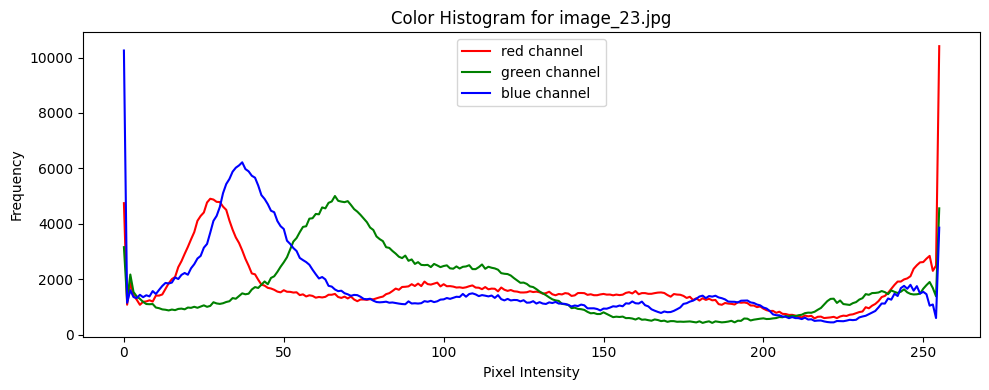

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'image_23.jpg'
img = Image.open(image_path).convert('RGB')  # ensure it's RGB
img_np = np.array(img)

# ---------------------------
# 1. Average Color
# ---------------------------
# Compute the mean for R, G, and B channels
average_color = img_np.mean(axis=(0, 1))  # shape (3,)
print("Average Color (R, G, B):", average_color.astype(int))

# ---------------------------
# 2. Color Histogram
# ---------------------------
# Plot histogram for each channel
colors = ('red', 'green', 'blue')
plt.figure(figsize=(10, 4))

for i, color in enumerate(colors):
    hist, bins = np.histogram(img_np[:, :, i], bins=256, range=(0, 256))
    plt.plot(hist, color=color, label=f'{color} channel')

plt.title('Color Histogram for image_23.jpg')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


Average Color (R, G, B): [112 106  93]


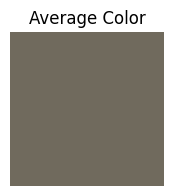

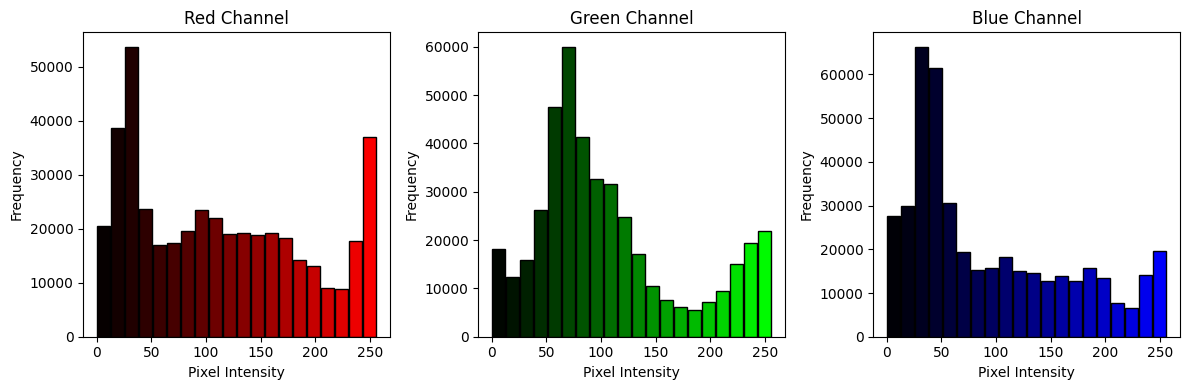

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_path = 'image_23.jpg'
img = Image.open(image_path).convert('RGB')
img_np = np.array(img)

# ---------------------------
# 1. Calculate Average Color
# ---------------------------
average_color = img_np.mean(axis=(0, 1)).astype(int)
print("Average Color (R, G, B):", average_color)

# ---------------------------
# 2. Show Average Color Patch
# ---------------------------
plt.figure(figsize=(2, 2))
plt.imshow([[average_color / 255]])  # normalized RGB for display
plt.axis('off')
plt.title('Average Color')
plt.show()

# ---------------------------
# 3. Colored Histogram with 20 Bins
# ---------------------------
bins = 20
colors = ['red', 'green', 'blue']
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(12, 4))

for i in range(3):
    channel = img_np[:, :, i]
    hist, bin_edges = np.histogram(channel, bins=bins, range=(0, 256))
    
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bar_colors = np.zeros((bins, 3))
    bar_colors[:, i] = bin_centers / 255  # normalize to 0-1 for RGB
    
    plt.subplot(1, 3, i+1)
    plt.bar(bin_centers, hist, width=12, color=bar_colors, edgecolor='black')
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


c:\Users\User\Desktop\476 data mining\HW\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


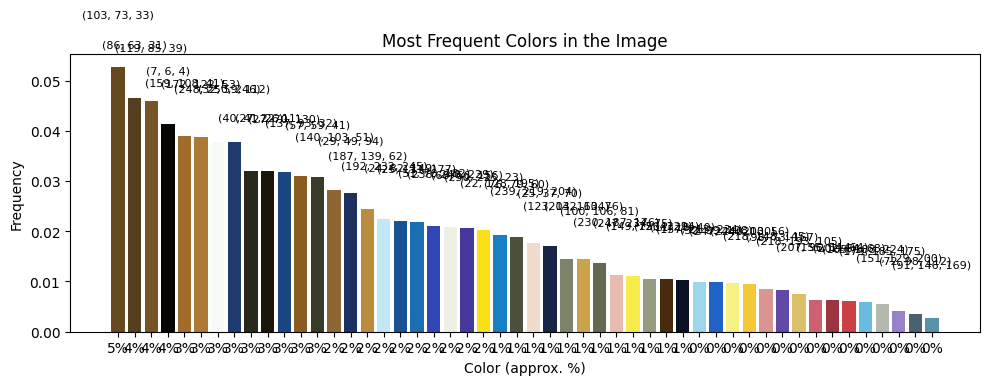

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image

# Load image and convert to RGB
img = Image.open("image_23.jpg").convert("RGB")
#img_small = img.resize((100, 100))  # Resize for faster clustering
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)  # Flatten image to a list of RGB pixels

# Run KMeans to find dominant colors
num_colors = 50
kmeans = KMeans(n_clusters=num_colors, random_state=0)
labels = kmeans.fit_predict(pixels)
centers = kmeans.cluster_centers_.astype(int)

# Count the frequency of each cluster
label_counts = Counter(labels)
total_count = sum(label_counts.values())

# Prepare color bar data
sorted_data = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
sorted_colors = [centers[i[0]] for i in sorted_data]
sorted_freqs = [i[1] / total_count for i in sorted_data]  # Normalize

# Plot color bars
plt.figure(figsize=(10, 4))
bars = plt.bar(range(num_colors), sorted_freqs, color=[tuple(c/255 for c in color) for color in sorted_colors])
plt.xticks(range(num_colors), [f"{int(freq*100)}%" for freq in sorted_freqs])
plt.title("Most Frequent Colors in the Image")
plt.ylabel("Frequency")
plt.xlabel("Color (approx. %)")

# Optional: Show RGB values as tooltip or below the bars
for i, color in enumerate(sorted_colors):
    plt.text(i, sorted_freqs[i] + 0.01, str(tuple(color)), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


calculating color variance, following two code blocks are for powerpoint examples.

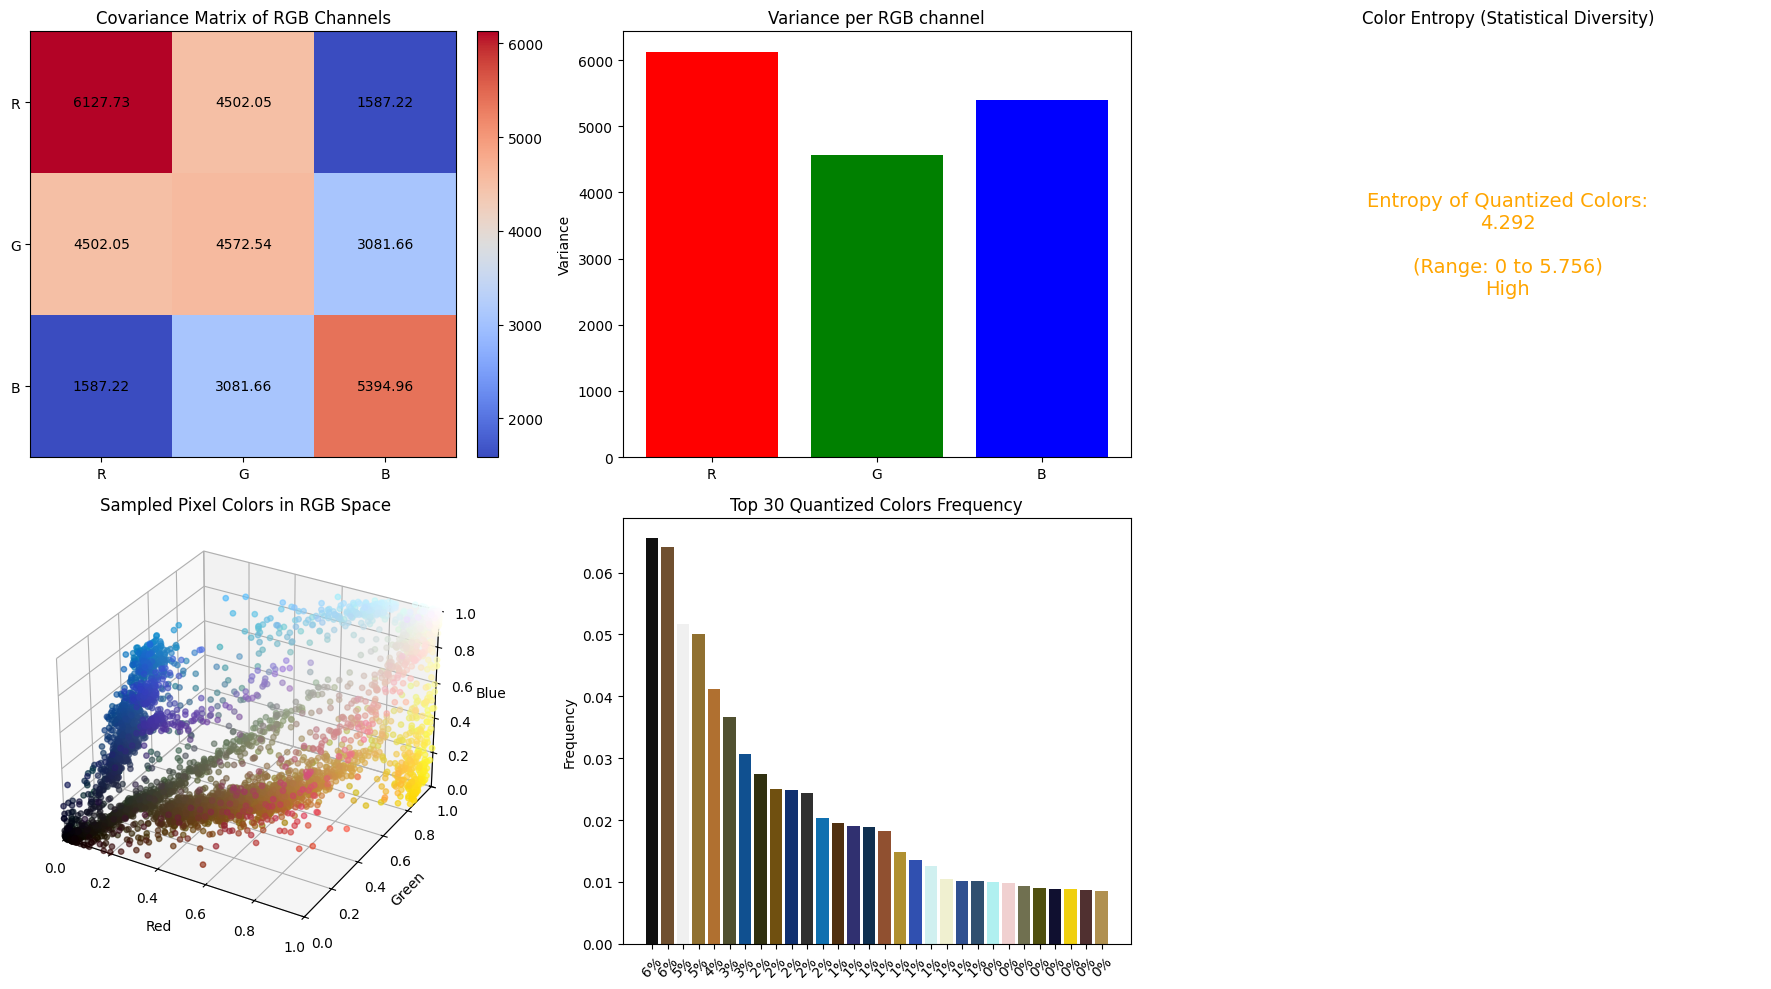

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
from PIL import Image

# Load image and convert to RGB
img = Image.open("image_23.jpg").convert("RGB")
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)  # Flatten image to list of RGB pixels

# ------------------------------
# 1. Variance per RGB channel & covariance matrix
variance_per_channel = np.var(pixels, axis=0)
cov_matrix = np.cov(pixels, rowvar=False)
trace_cov = np.trace(cov_matrix)

# ------------------------------
# 2. Quantize colors to reduce entropy complexity
# We'll reduce 256 levels per channel to 8 levels per channel
# so total unique colors = 8*8*8 = 512
def quantize_colors(pixels, levels=8):
    bins = np.linspace(0, 256, levels+1)
    quantized = np.digitize(pixels, bins) - 1  # bins are 1-indexed
    # Combine RGB channels into single integer color code
    color_codes = quantized[:,0] * (levels**2) + quantized[:,1] * levels + quantized[:,2]
    return color_codes

quantized_codes = quantize_colors(pixels, levels=8)
color_counts = Counter(quantized_codes)
total_count = sum(color_counts.values())

freqs = np.array(list(color_counts.values())) / total_count

# Entropy of quantized color distribution
entropy = scipy.stats.entropy(freqs)
max_entropy = np.log(len(color_counts))  # max possible entropy for this distribution

# ------------------------------
# 3. Plotting

fig = plt.figure(figsize=(18, 10))

# A) Covariance matrix heatmap
ax1 = fig.add_subplot(231)
im = ax1.imshow(cov_matrix, cmap='coolwarm')
ax1.set_xticks([0,1,2])
ax1.set_yticks([0,1,2])
ax1.set_xticklabels(['R','G','B'])
ax1.set_yticklabels(['R','G','B'])
ax1.set_title("Covariance Matrix of RGB Channels")
cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
for i in range(3):
    for j in range(3):
        ax1.text(j, i, f"{cov_matrix[i,j]:.2f}", ha='center', va='center', color='black')

# B) Variance per RGB channel bar plot
ax2 = fig.add_subplot(232)
ax2.bar(['R','G','B'], variance_per_channel, color=['red', 'green', 'blue'])
ax2.set_title("Variance per RGB channel")
ax2.set_ylabel("Variance")

# C) Entropy text box
ax3 = fig.add_subplot(233)
ax3.axis('off')
ax3.text(0.5, 0.5,
         f"Entropy of Quantized Colors:\n{entropy:.3f}\n\n"
         f"(Range: 0 to {max_entropy:.3f})\n"
         f"{'Low' if entropy < max_entropy/3 else ('High' if entropy > 2*max_entropy/3 else 'Medium')}",
         ha='center', va='center', fontsize=14, color='orange')
ax3.set_title("Color Entropy (Statistical Diversity)")

# D) 3D scatter plot of sampled pixels in RGB space
ax4 = fig.add_subplot(234, projection='3d')
sample_indices = np.random.choice(len(pixels), size=5000, replace=False)
sample_colors = pixels[sample_indices]/255.0
ax4.scatter(sample_colors[:,0], sample_colors[:,1], sample_colors[:,2],
            c=sample_colors, marker='o', alpha=0.6, s=15)
ax4.set_xlabel('Red')
ax4.set_ylabel('Green')
ax4.set_zlabel('Blue')
ax4.set_title("Sampled Pixel Colors in RGB Space")
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.set_zlim(0,1)

# E) Color frequency bar plot for top 20 colors (quantized)
top_colors = color_counts.most_common(30)
top_freqs = [x[1]/total_count for x in top_colors]

# Convert quantized code back to approximate RGB
def decode_quantized_color(code, levels=8):
    r = code // (levels**2)
    g = (code % (levels**2)) // levels
    b = code % levels
    scale = 256 / levels
    return (r * scale + scale/2, g * scale + scale/2, b * scale + scale/2)

top_rgb_colors = [decode_quantized_color(c[0]) for c in top_colors]

ax5 = fig.add_subplot(235)
bars = ax5.bar(range(len(top_freqs)), top_freqs,
               color=[tuple(np.array(c)/255) for c in top_rgb_colors])
ax5.set_xticks(range(len(top_freqs)))
ax5.set_xticklabels([f"{int(f*100)}%" for f in top_freqs], rotation=45)
ax5.set_title("Top 30 Quantized Colors Frequency")
ax5.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


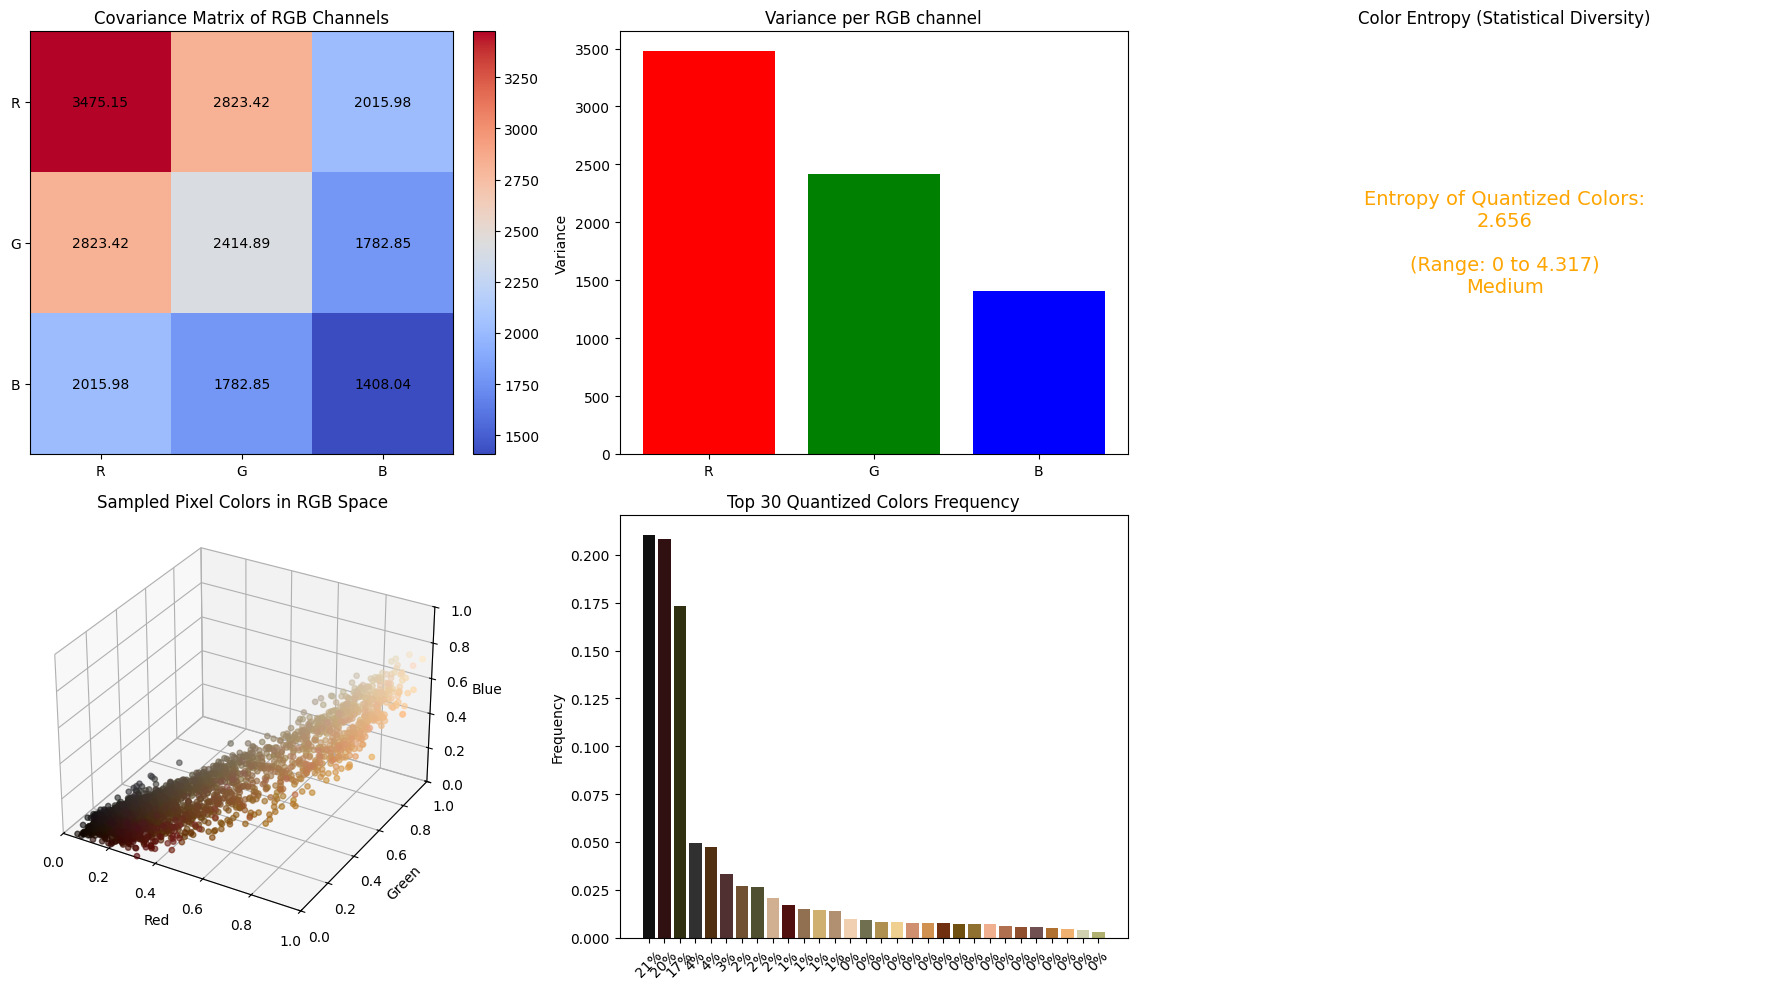

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
from PIL import Image

# Load image and convert to RGB
img = Image.open("download.jpeg").convert("RGB")
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)  # Flatten image to list of RGB pixels

# ------------------------------
# 1. Variance per RGB channel & covariance matrix
variance_per_channel = np.var(pixels, axis=0)
cov_matrix = np.cov(pixels, rowvar=False)
trace_cov = np.trace(cov_matrix)

# ------------------------------
# 2. Quantize colors to reduce entropy complexity
# We'll reduce 256 levels per channel to 8 levels per channel
# so total unique colors = 8*8*8 = 512
def quantize_colors(pixels, levels=8):
    bins = np.linspace(0, 256, levels+1)
    quantized = np.digitize(pixels, bins) - 1  # bins are 1-indexed
    # Combine RGB channels into single integer color code
    color_codes = quantized[:,0] * (levels**2) + quantized[:,1] * levels + quantized[:,2]
    return color_codes

quantized_codes = quantize_colors(pixels, levels=8)
color_counts = Counter(quantized_codes)
total_count = sum(color_counts.values())

freqs = np.array(list(color_counts.values())) / total_count

# Entropy of quantized color distribution
entropy = scipy.stats.entropy(freqs)
max_entropy = np.log(len(color_counts))  # max possible entropy for this distribution

# ------------------------------
# 3. Plotting

fig = plt.figure(figsize=(18, 10))

# A) Covariance matrix heatmap
ax1 = fig.add_subplot(231)
im = ax1.imshow(cov_matrix, cmap='coolwarm')
ax1.set_xticks([0,1,2])
ax1.set_yticks([0,1,2])
ax1.set_xticklabels(['R','G','B'])
ax1.set_yticklabels(['R','G','B'])
ax1.set_title("Covariance Matrix of RGB Channels")
cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
for i in range(3):
    for j in range(3):
        ax1.text(j, i, f"{cov_matrix[i,j]:.2f}", ha='center', va='center', color='black')

# B) Variance per RGB channel bar plot
ax2 = fig.add_subplot(232)
ax2.bar(['R','G','B'], variance_per_channel, color=['red', 'green', 'blue'])
ax2.set_title("Variance per RGB channel")
ax2.set_ylabel("Variance")

# C) Entropy text box
ax3 = fig.add_subplot(233)
ax3.axis('off')
ax3.text(0.5, 0.5,
         f"Entropy of Quantized Colors:\n{entropy:.3f}\n\n"
         f"(Range: 0 to {max_entropy:.3f})\n"
         f"{'Low' if entropy < max_entropy/3 else ('High' if entropy > 2*max_entropy/3 else 'Medium')}",
         ha='center', va='center', fontsize=14, color='orange')
ax3.set_title("Color Entropy (Statistical Diversity)")

# D) 3D scatter plot of sampled pixels in RGB space
ax4 = fig.add_subplot(234, projection='3d')
sample_indices = np.random.choice(len(pixels), size=5000, replace=False)
sample_colors = pixels[sample_indices]/255.0
ax4.scatter(sample_colors[:,0], sample_colors[:,1], sample_colors[:,2],
            c=sample_colors, marker='o', alpha=0.6, s=15)
ax4.set_xlabel('Red')
ax4.set_ylabel('Green')
ax4.set_zlabel('Blue')
ax4.set_title("Sampled Pixel Colors in RGB Space")
ax4.set_xlim(0,1)
ax4.set_ylim(0,1)
ax4.set_zlim(0,1)

# E) Color frequency bar plot for top 20 colors (quantized)
top_colors = color_counts.most_common(30)
top_freqs = [x[1]/total_count for x in top_colors]

# Convert quantized code back to approximate RGB
def decode_quantized_color(code, levels=8):
    r = code // (levels**2)
    g = (code % (levels**2)) // levels
    b = code % levels
    scale = 256 / levels
    return (r * scale + scale/2, g * scale + scale/2, b * scale + scale/2)

top_rgb_colors = [decode_quantized_color(c[0]) for c in top_colors]

ax5 = fig.add_subplot(235)
bars = ax5.bar(range(len(top_freqs)), top_freqs,
               color=[tuple(np.array(c)/255) for c in top_rgb_colors])
ax5.set_xticks(range(len(top_freqs)))
ax5.set_xticklabels([f"{int(f*100)}%" for f in top_freqs], rotation=45)
ax5.set_title("Top 30 Quantized Colors Frequency")
ax5.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Calculated some colorfulness metrics

In [33]:
img = np.array(Image.open("image_23.jpg").convert("RGB"))

# Convert to float for precision before calculations
img_float = img.astype("float")

# Compute rg = R - G, yb = 0.5*(R + G) - B
rg = img_float[:, :, 0] - img_float[:, :, 1]
yb = 0.5 * (img_float[:, :, 0] + img_float[:, :, 1]) - img_float[:, :, 2]

# Compute standard deviation and mean
std_rg = np.std(rg)
std_yb = np.std(yb)
mean_rg = np.mean(rg)
mean_yb = np.mean(yb)

# Final colorfulness metric
colorfulness = np.sqrt(std_rg**2 + std_yb**2) + 0.3 * np.sqrt(mean_rg**2 + mean_yb**2)

print("Colorfulness (Hasler & Süsstrunk):", round(colorfulness, 2))


Colorfulness (Hasler & Süsstrunk): 90.82


In [36]:
import cv2
import numpy as np
from PIL import Image

def warm_cool_ratio(image_path):
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
    
    hue = hsv[:, :, 0].flatten() * 2  # Convert to degrees (0–360)
    
    # Define tone masks
    warm_mask = ((hue >= 0) & (hue <= 30)) | ((hue >= 330) & (hue <= 360))
    cool_mask = (hue >= 90) & (hue <= 270)
    
    warm_pct = np.sum(warm_mask) / len(hue)
    cool_pct = np.sum(cool_mask) / len(hue)
    
    return warm_pct, cool_pct

warm, cool = warm_cool_ratio("image_23.jpg")
print(f"Warm tone: {warm:.2%}, Cool tone: {cool:.2%}")


Warm tone: 9.94%, Cool tone: 37.41%


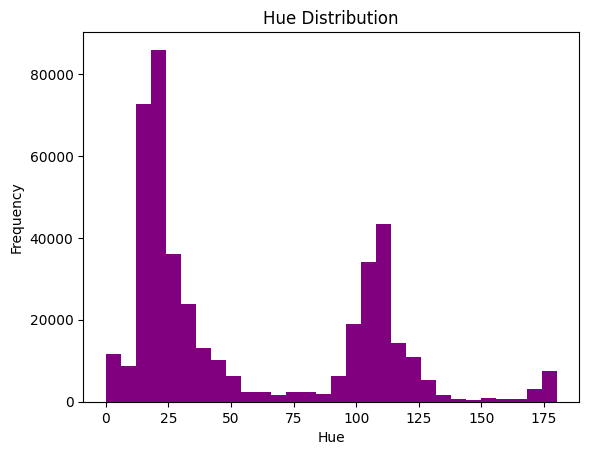

Polychromatic Score: 0.78 (1=very colorful, 0=monochrome)


In [ ]:
from scipy.stats import entropy

def polychromatic_score(image_path, bins=30):
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)
    hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
    
    hue = hsv[:, :, 0].flatten()
    hist, _ = np.histogram(hue, bins=bins, range=(0, 180), density=True)
    
    hue_entropy = entropy(hist)  # Higher entropy => more hues
    
    # Normalize: entropy of uniform distribution (max diversity)
    max_entropy = np.log(bins)
    normalized_score = hue_entropy / max_entropy  # 0 = mono, 1 = poly
    
    return normalized_score

score = polychromatic_score("image_23.jpg")
print(f"Polychromatic Score: {score:.2f} (1=very colorful, 0=monochrome)")


In [1]:
# 📦 Install required packages
!pip install -q google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client pydrive pandas scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


After this markdown there is codes to apply above expreiments to whole data and create results for each style. Unfortunatelly my RAM was not enougt therefore I used colab to run my codes.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from PIL import Image
import pandas as pd
import os
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define paths
csv_path = '/content/balanced_data.csv'
image_folder = '/content/drive/MyDrive/Data Mining 476/project_images'

# Function to load and resize image
def load_image(file_name):
    file_path = os.path.join(image_folder, file_name)
    if not os.path.exists(file_path):
        print(f"Image {file_name} not found at {file_path}.")
        return None
    img = Image.open(file_path).convert("RGB")
    # Resize to half width and height
    new_size = (img.width // 2, img.height // 2)
    img_resized = img.resize(new_size, Image.Resampling.LANCZOS)
    img.close()  # Close original image to free memory
    return img_resized

most used 50 color histogram of each style

In [ ]:
# Load CSV
df = pd.read_csv(csv_path)

# Group indices by style
styles = df.groupby('style').apply(lambda x: x.index.tolist()).to_dict()

# Dictionary to store pixels for each style
style_pixels = {}

# Process each style
num_colors = 50
for style, indices in styles.items():
    if style in ["Naïve art (Primitivism)", "Symbolism"]: # change according to left styles if conection lost
        print(f"Processing style: {style}")
        all_pixels = []

        # Collect pixels from all images in this style
        for index in indices:
            file_name = f"image_{index}.jpg"
            img = load_image(file_name)
            if img is None:
                continue
            img_np = np.array(img)
            img.close()  # Close resized image to free memory
            pixels = img_np.reshape(-1, 3)  # Flatten to RGB pixels
            all_pixels.append(pixels)
            del img_np  # Delete NumPy array to free memory

        if not all_pixels:
            print(f"No images found for style {style}")
            continue

        # Combine pixels from all images in this style
        all_pixels = np.vstack(all_pixels)
        style_pixels[style] = all_pixels  # Store pixels in dictionary
        del all_pixels  # Free memory after storing

        # Run KMeans on combined pixels
        kmeans = KMeans(n_clusters=num_colors, random_state=0)
        labels = kmeans.fit_predict(style_pixels[style])
        centers = kmeans.cluster_centers_.astype(int)

        # Count frequency of each cluster
        label_counts = Counter(labels)
        total_count = sum(label_counts.values())

        # Prepare color bar data
        sorted_data = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
        sorted_colors = [centers[i[0]] for i in sorted_data]
        sorted_freqs = [i[1] / total_count for i in sorted_data]  # Normalize

        # Plot color bars for this style
        plt.figure(figsize=(10, 4))
        bars = plt.bar(range(num_colors), sorted_freqs, color=[tuple(c/255 for c in color) for color in sorted_colors])
        plt.xticks(range(num_colors), [f"{int(freq*100)}%" for freq in sorted_freqs])
        plt.title(f"Most Frequent Colors in {style}")
        plt.ylabel("Frequency")
        plt.xlabel("Color (approx. %)")

        # Add RGB values
        for i, color in enumerate(sorted_colors):
            plt.text(i, sorted_freqs[i] + 0.01, str(tuple(color)), ha='center', fontsize=8)

        plt.tight_layout()
        plt.savefig(f"/content/color_analysis_{style.replace(' ', '_')}.png")  # Save chart
        plt.close()

print("Processing complete!")
print("Pixel data stored in style_pixels dictionary for reuse.")

to print RGB colorspace of styles along with some other aspects i calculated above.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import pandas as pd
import os
from google.colab import drive
from scipy.stats import entropy
from mpl_toolkits.mplot3d import Axes3D

# Function to quantize colors
def quantize_colors(pixels, levels=8):
    bins = np.linspace(0, 256, levels+1)
    quantized = np.digitize(pixels, bins) - 1
    color_codes = quantized[:,0] * (levels**2) + quantized[:,1] * levels + quantized[:,2]
    return color_codes

# Function to decode quantized color
def decode_quantized_color(code, levels=8):
    r = code // (levels**2)
    g = (code % (levels**2)) // levels
    b = code % levels
    scale = 256 / levels
    return (r * scale + scale/2, g * scale + scale/2, b * scale + scale/2)

# Load CSV
df = pd.read_csv(csv_path)

# Group indices by style
styles = df.groupby('style').apply(lambda x: x.index.tolist()).to_dict()

# Process each style
for style, indices in styles.items():
    print(f"Processing style: {style}")
    all_pixels = []

    # Collect pixels from all images in this style
    for index in indices:
        file_name = f"image_{index}.jpg"
        img = load_image(file_name)
        if img is None:
            continue
        img_np = np.array(img)
        img.close()
        pixels = img_np.reshape(-1, 3)
        all_pixels.append(pixels)
        del img_np

    if not all_pixels:
        print(f"No images found for style {style}")
        continue

    # Combine pixels
    pixels = np.vstack(all_pixels)

    # Variance per RGB channel & covariance matrix
    variance_per_channel = np.var(pixels, axis=0)
    cov_matrix = np.cov(pixels, rowvar=False)
    trace_cov = np.trace(cov_matrix)

    # Quantize colors and compute entropy
    quantized_codes = quantize_colors(pixels, levels=8)
    color_counts = Counter(quantized_codes)
    total_count = sum(color_counts.values())
    freqs = np.array(list(color_counts.values())) / total_count
    entropy_val = entropy(freqs)
    max_entropy = np.log(len(color_counts))

    # Plotting
    fig = plt.figure(figsize=(18, 10))

    # A) Covariance matrix heatmap
    ax1 = fig.add_subplot(221)
    im = ax1.imshow(cov_matrix, cmap='coolwarm')
    ax1.set_xticks([0, 1, 2])
    ax1.set_yticks([0, 1, 2])
    ax1.set_xticklabels(['R', 'G', 'B'])
    ax1.set_yticklabels(['R', 'G', 'B'])
    ax1.set_title("Covariance Matrix of RGB Channels")
    cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    for i in range(3):
        for j in range(3):
            ax1.text(j, i, f"{cov_matrix[i,j]:.2f}", ha='center', va='center', color='black')

    # B) Entropy text box
    ax2 = fig.add_subplot(222)
    ax2.axis('off')
    ax2.text(0.5, 0.5,
             f"Entropy of Quantized Colors:\n{entropy_val:.3f}\n\n"
             f"(Range: 0 to {max_entropy:.3f})\n"
             f"{'Low' if entropy_val < max_entropy/3 else ('High' if entropy_val > 2*max_entropy/3 else 'Medium')}",
             ha='center', va='center', fontsize=14, color='orange')
    ax2.set_title("Color Entropy (Statistical Diversity)")

    # C) 3D scatter plot of sampled pixels in RGB space
    ax3 = fig.add_subplot(223, projection='3d')
    sample_indices = np.random.choice(len(pixels), size=min(5000, len(pixels)), replace=False)
    sample_colors = pixels[sample_indices] / 255.0
    ax3.scatter(sample_colors[:,0], sample_colors[:,1], sample_colors[:,2],
                c=sample_colors, marker='o', alpha=0.6, s=15)
    ax3.set_xlabel('Red')
    ax3.set_ylabel('Green')
    ax3.set_zlabel('Blue')
    ax3.set_title("Sampled Pixel Colors in RGB Space")
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_zlim(0, 1)

    # D) Color frequency bar plot for top 30 quantized colors
    top_colors = color_counts.most_common(30)
    top_freqs = [x[1] / total_count for x in top_colors]
    top_rgb_colors = [decode_quantized_color(c[0]) for c in top_colors]
    
    ax4 = fig.add_subplot(224)
    bars = ax4.bar(range(len(top_freqs)), top_freqs,
                   color=[tuple(np.array(c)/255) for c in top_rgb_colors])
    ax4.set_xticks(range(len(top_freqs)))
    ax4.set_xticklabels([f"{int(f*100)}%" for f in top_freqs], rotation=45)
    ax4.set_title("Top 30 Quantized Colors Frequency")
    ax4.set_ylabel("Frequency")

    plt.tight_layout()
    plt.savefig(f"/content/color_stats_{style.replace(' ', '_')}.png")
    plt.close()

    del pixels  # Free memory

print("Processing complete! Plots saved to /content/")

to print the average color of each style

In [ ]:
# Load CSV
df = pd.read_csv(csv_path)

# Group indices by style
styles = df.groupby('style').apply(lambda x: x.index.tolist()).to_dict()

# Process each style
for style, indices in styles.items():
        print(f"Processing style: {style}")
        all_pixels = []

        # Collect pixels from all images in this style
        for index in indices:
            file_name = f"image_{index}.jpg"
            img = load_image(file_name)
            if img is None:
                continue
            img_np = np.array(img)
            img.close()
            pixels = img_np.reshape(-1, 3)
            all_pixels.append(pixels)
            del img_np

        if not all_pixels:
            print(f"No images found for style {style}")
            continue

        # Combine pixels
        pixels = np.vstack(all_pixels)

        # Calculate average color
        average_color = img_np.mean(axis=(0, 1)).astype(int)

        # Plot color
        plt.figure(figsize=(2, 2))
        plt.imshow([[average_color / 255]])  # normalized RGB for display
        plt.axis('off')
        plt.title('Average Color')
        plt.show()

        del pixels  # Free memory

print("Processing complete! Plots saved to /content/")

The result from colab is used to plot.

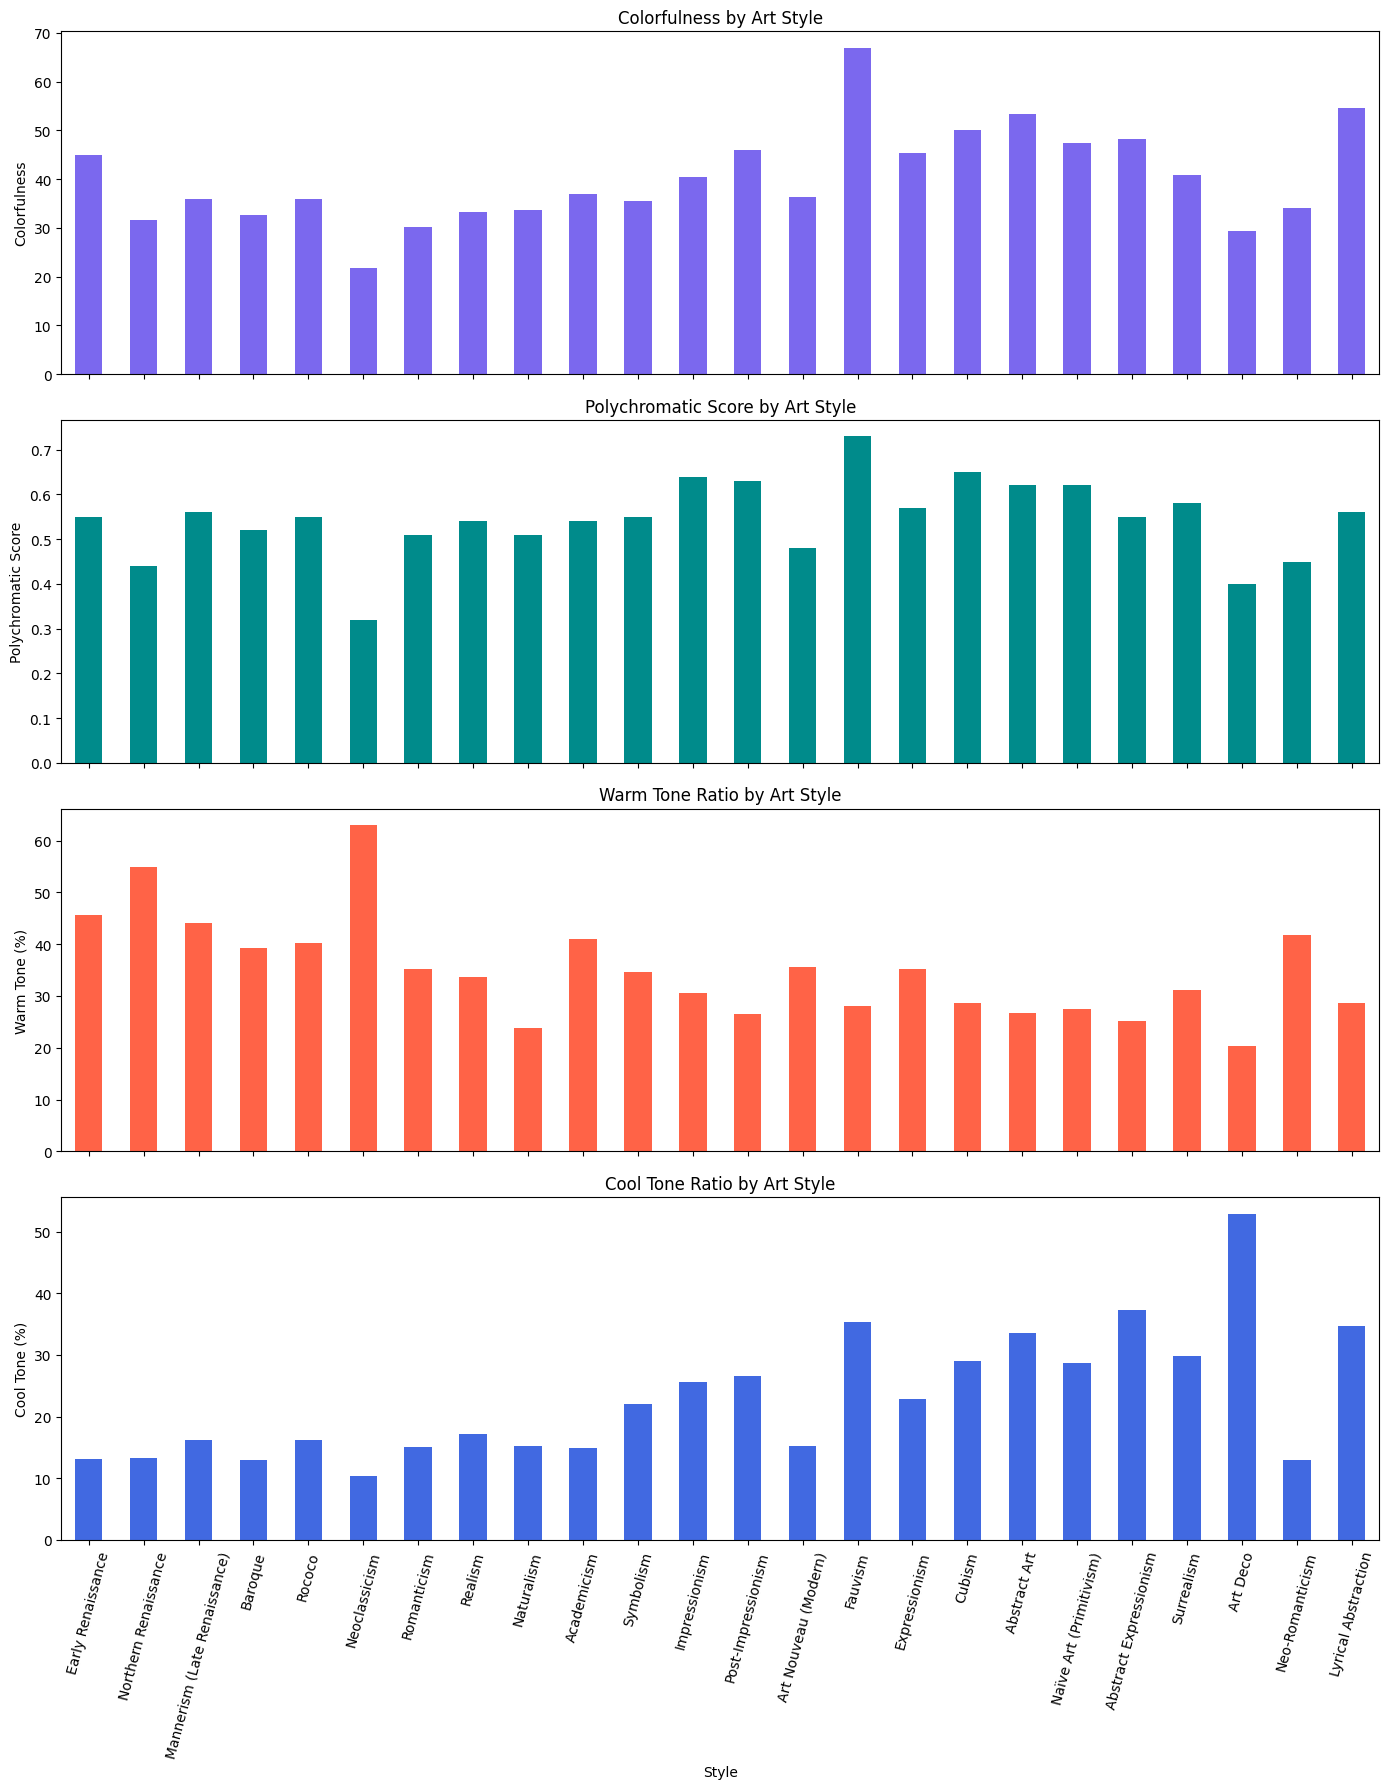

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data: sorted by historical order of styles
data = [
    {"Style": "Early Renaissance", "Colorfulness": 44.99, "Warm Tone": 45.67, "Cool Tone": 13.18, "Polychromatic Score": 0.55},
    {"Style": "Northern Renaissance", "Colorfulness": 31.69, "Warm Tone": 54.84, "Cool Tone": 13.24, "Polychromatic Score": 0.44},
    {"Style": "Mannerism (Late Renaissance)", "Colorfulness": 35.85, "Warm Tone": 44.12, "Cool Tone": 16.15, "Polychromatic Score": 0.56},
    {"Style": "Baroque", "Colorfulness": 32.58, "Warm Tone": 39.24, "Cool Tone": 13.04, "Polychromatic Score": 0.52},
    {"Style": "Rococo", "Colorfulness": 35.94, "Warm Tone": 40.16, "Cool Tone": 16.24, "Polychromatic Score": 0.55},
    {"Style": "Neoclassicism", "Colorfulness": 21.80, "Warm Tone": 63.02, "Cool Tone": 10.34, "Polychromatic Score": 0.32},
    {"Style": "Romanticism", "Colorfulness": 30.15, "Warm Tone": 35.12, "Cool Tone": 15.15, "Polychromatic Score": 0.51},
    {"Style": "Realism", "Colorfulness": 33.19, "Warm Tone": 33.73, "Cool Tone": 17.16, "Polychromatic Score": 0.54},
    {"Style": "Naturalism", "Colorfulness": 33.62, "Warm Tone": 23.83, "Cool Tone": 15.24, "Polychromatic Score": 0.51},
    {"Style": "Academicism", "Colorfulness": 36.87, "Warm Tone": 41.03, "Cool Tone": 14.90, "Polychromatic Score": 0.54},
    {"Style": "Symbolism", "Colorfulness": 35.49, "Warm Tone": 34.66, "Cool Tone": 22.06, "Polychromatic Score": 0.55},
    {"Style": "Impressionism", "Colorfulness": 40.46, "Warm Tone": 30.66, "Cool Tone": 25.65, "Polychromatic Score": 0.64},
    {"Style": "Post-Impressionism", "Colorfulness": 46.06, "Warm Tone": 26.54, "Cool Tone": 26.56, "Polychromatic Score": 0.63},
    {"Style": "Art Nouveau (Modern)", "Colorfulness": 36.41, "Warm Tone": 35.58, "Cool Tone": 15.17, "Polychromatic Score": 0.48},
    {"Style": "Fauvism", "Colorfulness": 66.98, "Warm Tone": 28.12, "Cool Tone": 35.39, "Polychromatic Score": 0.73},
    {"Style": "Expressionism", "Colorfulness": 45.34, "Warm Tone": 35.12, "Cool Tone": 22.84, "Polychromatic Score": 0.57},
    {"Style": "Cubism", "Colorfulness": 50.03, "Warm Tone": 28.58, "Cool Tone": 28.96, "Polychromatic Score": 0.65},
    {"Style": "Abstract Art", "Colorfulness": 53.40, "Warm Tone": 26.72, "Cool Tone": 33.50, "Polychromatic Score": 0.62},
    {"Style": "Naïve Art (Primitivism)", "Colorfulness": 47.36, "Warm Tone": 27.51, "Cool Tone": 28.70, "Polychromatic Score": 0.62},
    {"Style": "Abstract Expressionism", "Colorfulness": 48.17, "Warm Tone": 25.26, "Cool Tone": 37.32, "Polychromatic Score": 0.55},
    {"Style": "Surrealism", "Colorfulness": 40.94, "Warm Tone": 31.15, "Cool Tone": 29.87, "Polychromatic Score": 0.58},
    {"Style": "Art Deco", "Colorfulness": 29.27, "Warm Tone": 20.33, "Cool Tone": 52.93, "Polychromatic Score": 0.40},
    {"Style": "Neo-Romanticism", "Colorfulness": 34.13, "Warm Tone": 41.69, "Cool Tone": 12.96, "Polychromatic Score": 0.45},
    {"Style": "Lyrical Abstraction", "Colorfulness": 54.52, "Warm Tone": 28.66, "Cool Tone": 34.65, "Polychromatic Score": 0.56},
]

# Create DataFrame
df = pd.DataFrame(data)

# Set style as index for easier plotting
df.set_index("Style", inplace=True)

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

df["Colorfulness"].plot(kind='bar', ax=axs[0], color="mediumslateblue")
axs[0].set_ylabel("Colorfulness")
axs[0].set_title("Colorfulness by Art Style")

df["Polychromatic Score"].plot(kind='bar', ax=axs[1], color="darkcyan")
axs[1].set_ylabel("Polychromatic Score")
axs[1].set_title("Polychromatic Score by Art Style")

df["Warm Tone"].plot(kind='bar', ax=axs[2], color="tomato")
axs[2].set_ylabel("Warm Tone (%)")
axs[2].set_title("Warm Tone Ratio by Art Style")

df["Cool Tone"].plot(kind='bar', ax=axs[3], color="royalblue")
axs[3].set_ylabel("Cool Tone (%)")
axs[3].set_title("Cool Tone Ratio by Art Style")

plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
